In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
import pandas as pd
import netCDF4 as nc
import cdo

In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
#@memory.cache
new_file = nc.MFDataset('/g/data3/hh5/tmp/cosima/mom01v5/KDS75_newbathy_JRA/output01[0-3]/ocean.nc')
rho_0 = new_file.variables['pot_rho_0'][:,0,:,:]
rho_1 = new_file.variables['pot_rho_0'][:,14,:,:]
rho_2 = new_file.variables['pot_rho_0'][:,17,:,:]
lat = new_file.variables['yt_ocean'][:]
lon = new_file.variables['xt_ocean'][:]
mld_mom = new_file.variables['mld'][:]
lon.shape

(3600,)

In [4]:
m_rho_0 = np.mean(rho_0,axis=0) 
m_rho_1 = np.mean(rho_1,axis=0) 
m_rho_2 = np.mean(rho_2,axis=0) 
m_mld_mom = np.mean(mld_mom,axis=0) 
min_mld_mom = np.min(mld_mom,axis=0) 
max_mld_mom = np.max(mld_mom,axis=0) 
m_rho_2.shape

(2700, 3600)

In [5]:
dep_0 = new_file.variables['st_edges_ocean'][0]
dep_1 = new_file.variables['st_edges_ocean'][14]
dep_2 = new_file.variables['st_edges_ocean'][17]
mld = 0.03 * ((dep_2-dep_1)/(m_rho_2-m_rho_1)) + dep_0
mld.shape

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


(2700, 3600)

In [6]:
lon_mom = lon
min_lon_mom = lon
max_lon_mom = lon
mld, lon = shiftgrid(0, mld, lon, start=True)
m_mld_mom, lon_mom = shiftgrid(0, m_mld_mom, lon_mom, start=True)
min_mld_mom, min_lon_mom = shiftgrid(0, min_mld_mom, min_lon_mom, start=True)
min_mld_mom, max_lon_mom = shiftgrid(0, max_mld_mom, max_lon_mom, start=True)

In [7]:
new_file.close()

In [9]:
argo_file = nc.Dataset('/g/data1/v45/fw4078/obs-data/Argo_mixedlayers_monthlyclim_03192017.nc')
mld_argo = argo_file.variables['mld_dt_max'][:] 
lat_argo = argo_file.variables['lat']
lon_argo = argo_file.variables['lon']
m_mld_argo = np.mean(mld_argo,axis=2)
#m_mld_argo, lon_argo = shiftgrid(0, m_mld_argo, lon_argo, start=True)

obs_file = nc.Dataset('/g/data1/v45/fw4078/obs-data/mld_DR003_c1m_reg2.0.nc')
mld_obs = obs_file.variables['mld'][:]
lat_obs = obs_file.variables['lat']
lon_obs = obs_file.variables['lon']
m_mld_obs = np.mean(mld_obs,axis=0)
min_mld_obs = np.min(mld_obs,axis=0)
max_mld_obs = np.max(mld_obs,axis=0)
m_mld_obs.shape

(90, 180)

In [10]:
mila_file = nc.Dataset('/g/data1/v45/fw4078/obs-data/ml_MLD_CLIM_ann.nc')
mld_mila = mila_file.variables['MLD']
lat_mila = mila_file.variables['LATITUDE']
lon_mila = mila_file.variables['LONGITUDE']
new_lon_mila = np.linspace(0, 360, 360)
#m_mld_mila = np.mean(mld_mila, axis=0)
#min_mld_mila = np.min(mld_mila, axis=0)
#max_mld_mila = np.max(mld_mila, axis=0)

Text(0.5,1,'MILA GPV mean MLD')

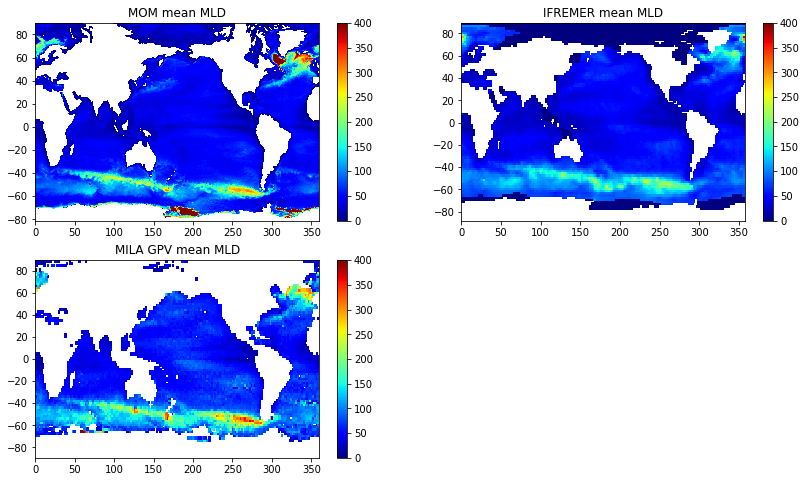

In [11]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2, 2, 1)
#cax1 = ax1.pcolormesh(x, y, old_m_sst, shading='flat', cmap=plt.cm.jet)
cax1 = ax1.pcolormesh(lon, lat, m_mld_mom, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=400.0)
fig.colorbar(cax1)
#cbar.outline.set_linewidth(1)
plt.title('MOM mean MLD', fontsize=12)

ax2 = fig.add_subplot(2, 2, 2)
#cax1 = ax1.pcolormesh(x, y, old_m_sst, shading='flat', cmap=plt.cm.jet)
cax2 = ax2.pcolormesh(lon_obs, lat_obs, m_mld_obs, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=400.0)
fig.colorbar(cax1)
#cbar.outline.set_linewidth(1)
plt.title('IFREMER mean MLD', fontsize=12)

ax3 = fig.add_subplot(2, 2, 3)
#cax1 = ax1.pcolormesh(x, y, old_m_sst, shading='flat', cmap=plt.cm.jet)
cax3 = ax3.pcolormesh(new_lon_mila, lat_mila, mld_mila, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=400.0)
fig.colorbar(cax3)
#cbar.outline.set_linewidth(1)
plt.title('MILA GPV mean MLD', fontsize=12)

#ax4 = fig.add_subplot(2, 2, 4)
##cax1 = ax1.pcolormesh(x, y, old_m_sst, shading='flat', cmap=plt.cm.jet)
#cax4 = ax4.pcolormesh(lon_argo, lat_argo, m_mld_argo, shading='flat', cmap=plt.cm.jet)#, vmin=0.0, vmax=400.0)
#fig.colorbar(cax4)
##cbar.outline.set_linewidth(1)
#plt.title('Argo mean MLD', fontsize=12)

#ax4 = fig.add_subplot(3, 3, 4)
##cax1 = ax1.pcolormesh(x, y, old_m_sst, shading='flat', cmap=plt.cm.jet)
#cax4 = ax4.pcolormesh(lon, lat, max_mld_mom, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=400.0)
#fig.colorbar(cax4)
##cbar.outline.set_linewidth(1)
#plt.title('MOM maximum MLD', fontsize=12)
#
#ax5 = fig.add_subplot(3, 3, 5)
##cax1 = ax1.pcolormesh(x, y, old_m_sst, shading='flat', cmap=plt.cm.jet)
#cax5 = ax5.pcolormesh(lon_obs, lat_obs, max_mld_obs, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=400.0)
#fig.colorbar(cax5)
##cbar.outline.set_linewidth(1)
#plt.title('IFREMER maximum MLD', fontsize=12)
#
#ax6 = fig.add_subplot(3, 3, 6)
##cax1 = ax1.pcolormesh(x, y, old_m_sst, shading='flat', cmap=plt.cm.jet)
#cax6 = ax6.pcolormesh(new_lon_mila, lat_mila, max_mld_mila, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=400.0)
#fig.colorbar(cax6)
##cbar.outline.set_linewidth(1)
#plt.title('MILA GPV maximum MLD', fontsize=12)
#
#ax7 = fig.add_subplot(3, 3, 7)
##cax1 = ax1.pcolormesh(x, y, old_m_sst, shading='flat', cmap=plt.cm.jet)
#cax7 = ax7.pcolormesh(lon, lat, min_mld_mom, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=400.0)
#fig.colorbar(cax7)
##cbar.outline.set_linewidth(1)
#plt.title('MOM minimum MLD', fontsize=12)
#
#ax8 = fig.add_subplot(3, 3, 8)
##cax1 = ax1.pcolormesh(x, y, old_m_sst, shading='flat', cmap=plt.cm.jet)
#cax8 = ax8.pcolormesh(lon_obs, lat_obs, min_mld_obs, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=400.0)
#fig.colorbar(cax8)
##cbar.outline.set_linewidth(1)
#plt.title('IFREMER minimum MLD', fontsize=12)
#
#ax9 = fig.add_subplot(3, 3, 9)
##cax1 = ax1.pcolormesh(x, y, old_m_sst, shading='flat', cmap=plt.cm.jet)
#cax9 = ax9.pcolormesh(new_lon_mila, lat_mila, min_mld_mila, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=400.0)
#fig.colorbar(cax9)
##cbar.outline.set_linewidth(1)
#plt.title('MILA GPV minimum MLD', fontsize=12)